# CHRONIC KIDNEY DISEASES PREDICTION

## IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
!pip install dython
from dython.nominal import associations
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv(r"/content/chronickidneydisease.csv")
df

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

## EXPLORATORY DATA ANALYSIS

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## CONVERTING DATA TYPES

In [ ]:
def convert_dtype(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')    
    #whereever we have Nan values , this errors parameter will hanfle that 


In [ ]:
features=['pcv','wc','rc']
for i in features:
    convert_dtype(df,i)

## CHECKING THE CKD AND NOT CKD

<AxesSubplot:xlabel='classification', ylabel='age'>

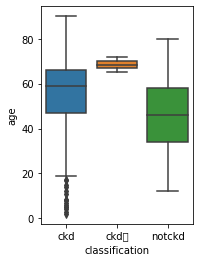

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(x=df['classification'],y=df['age'])

In [ ]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(df)


## Analysing distribution of each and every column

In [ ]:
len(num_col)

15

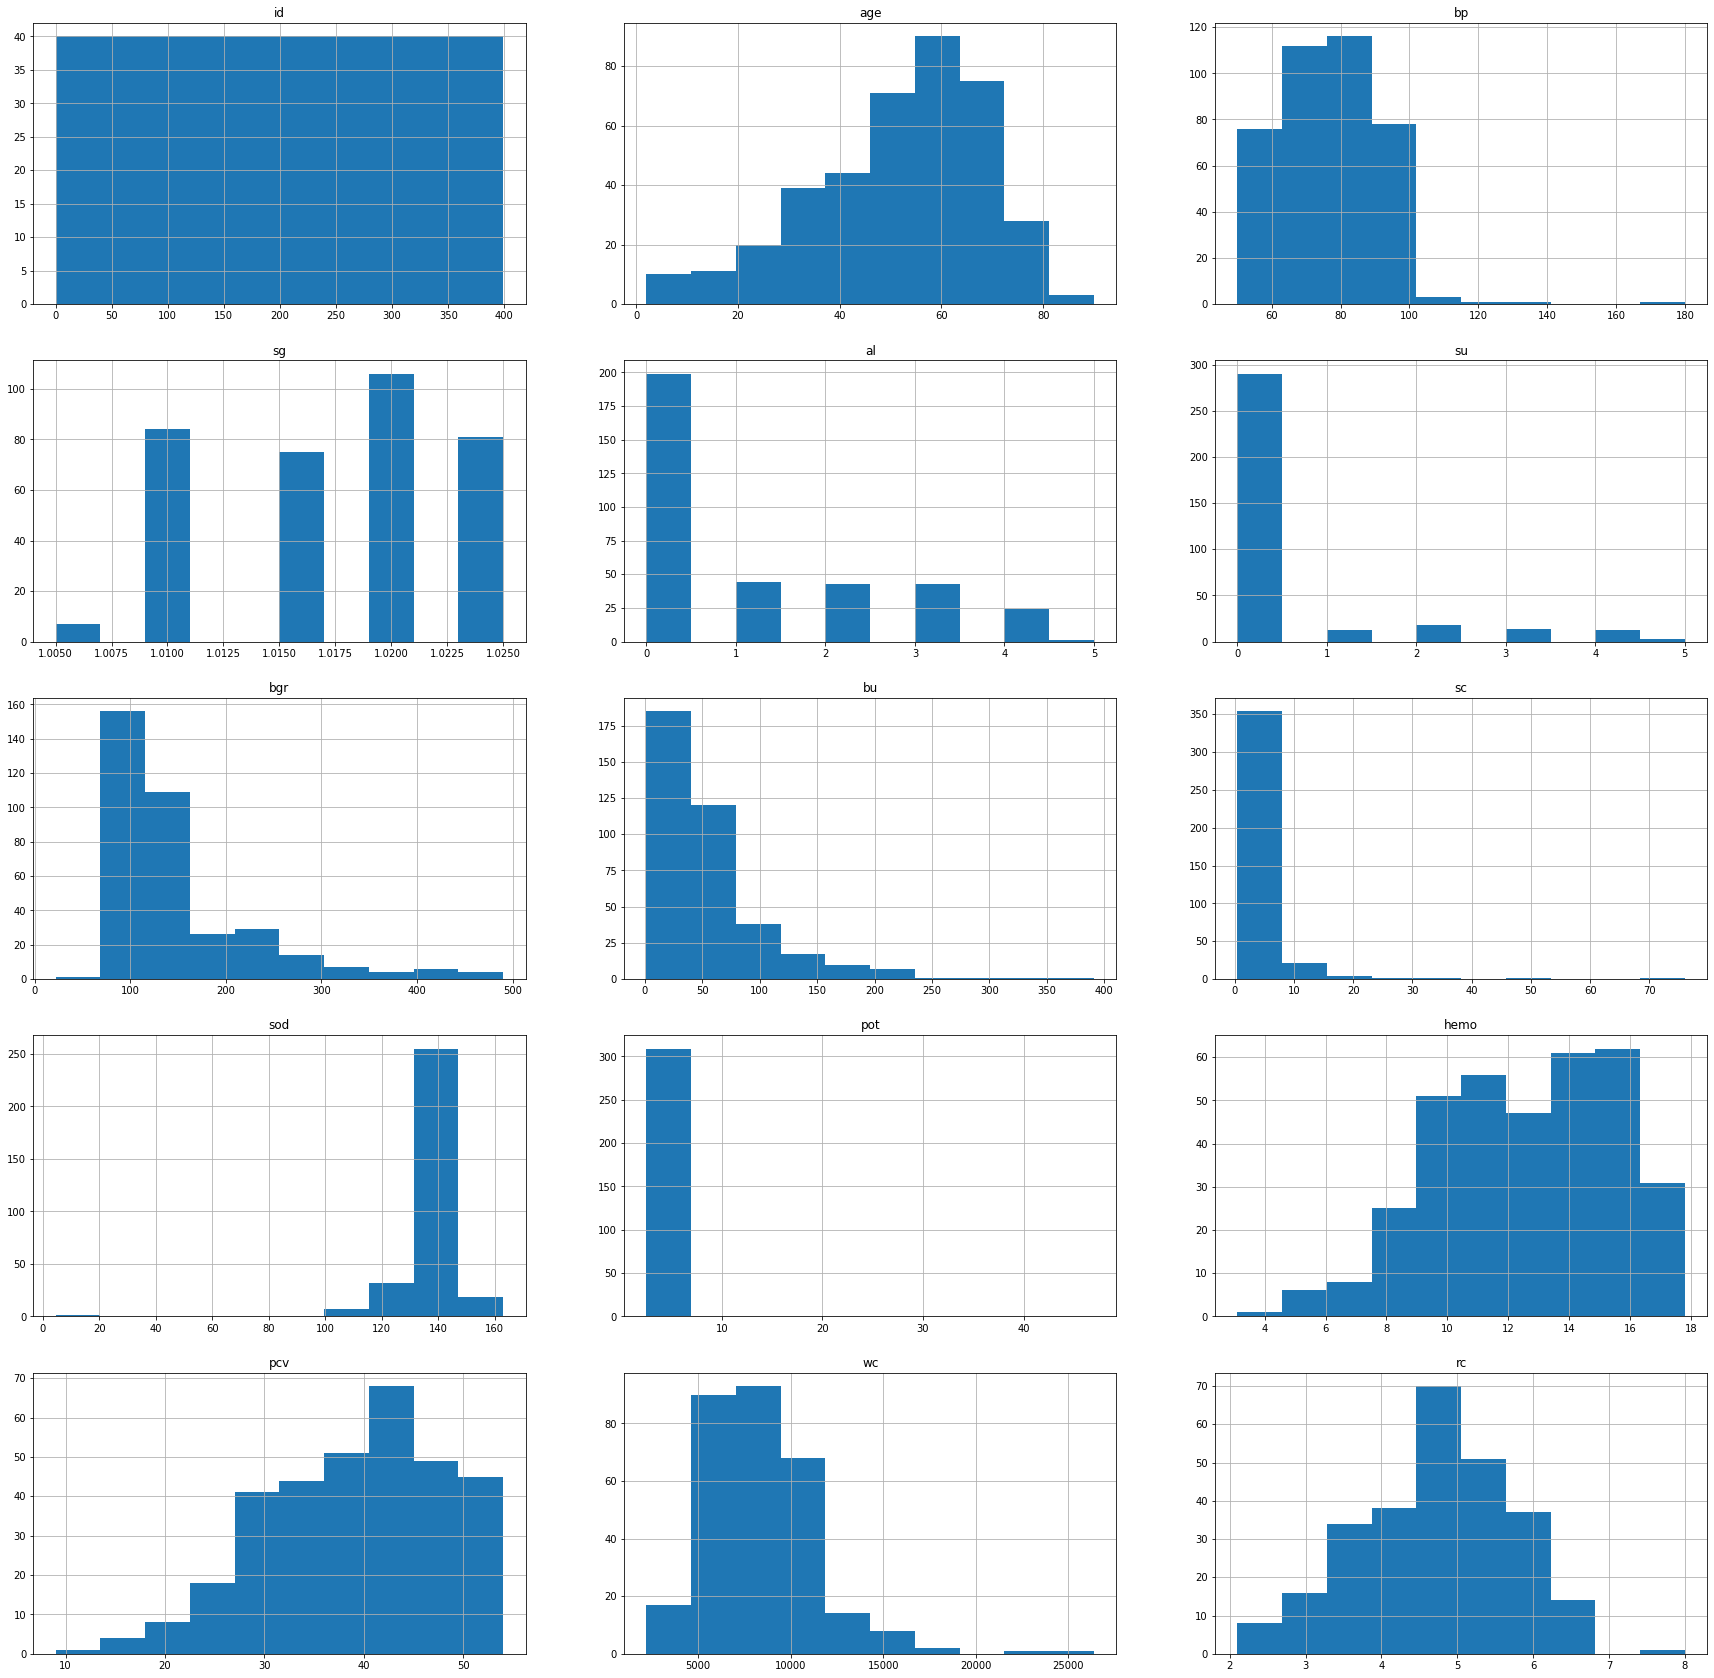

In [ ]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)      
    df[feature].hist()
    plt.title(feature)

# Check  distribution of categorical Data


In [ ]:
len(cat_col)

11

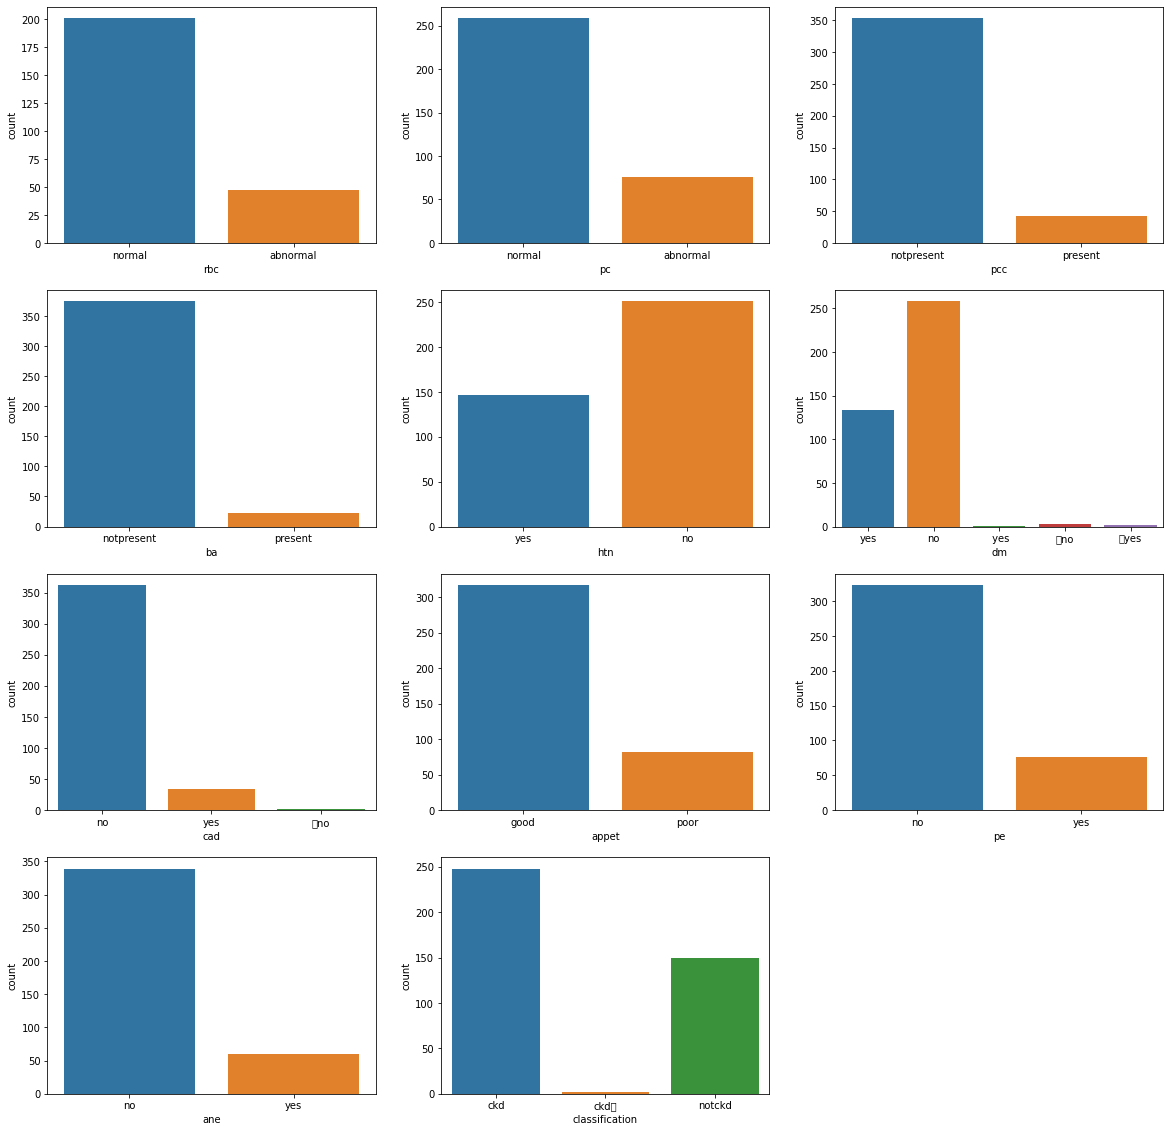

In [ ]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

In [ ]:
df.groupby(['rbc','classification'])['rc'].agg(['count','mean','median','min','max'])


count      mean  median  min  max
rbc      classification                                   
abnormal ckd                25  3.832000     3.7  2.5  5.6
normal   ckd                40  3.782500     3.8  2.1  8.0
         ckd\t               0       NaN     NaN  NaN  NaN
         notckd            134  5.368657     5.3  4.4  6.5

## Relationship between haemoglobin and packed cell volume


Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

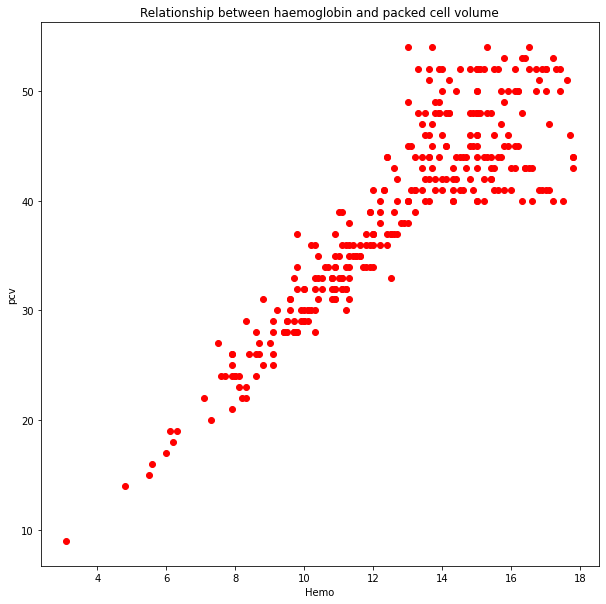

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=df.hemo,y=df['pcv'],color="red")
plt.xlabel('Hemo')
plt.ylabel('pcv')
plt.title('Relationship between haemoglobin and packed cell volume')

## Analyse distribution of red blood cell count chronic as well as non chronic


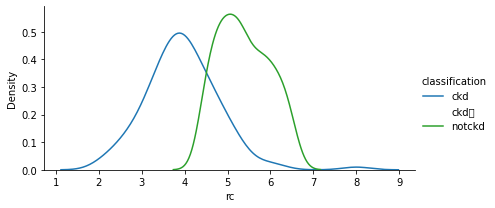

In [ ]:
grid=sns.FacetGrid(df,hue='classification',aspect=2)
grid.map(sns.kdeplot,'rc')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

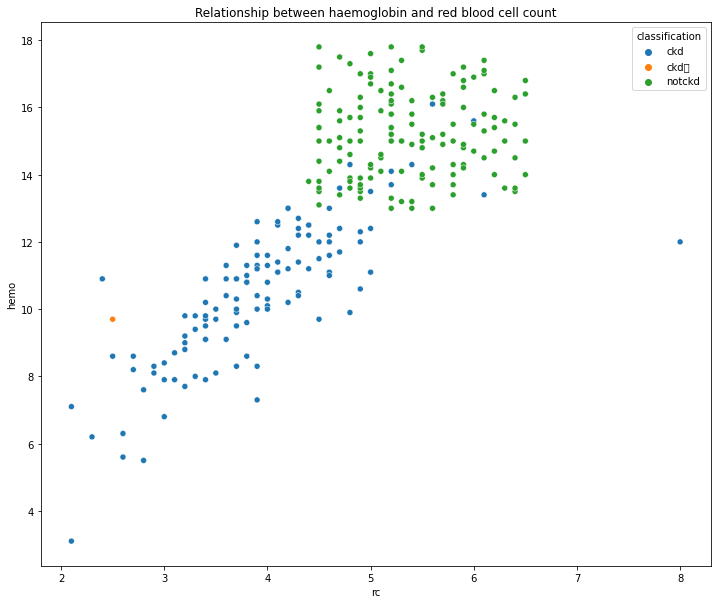

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['rc'],y=df['hemo'],hue=df['classification'])
plt.xlabel('rc')
plt.ylabel('hemo')
plt.title('Relationship between haemoglobin and red blood cell count')

## CORRELATION

In [ ]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

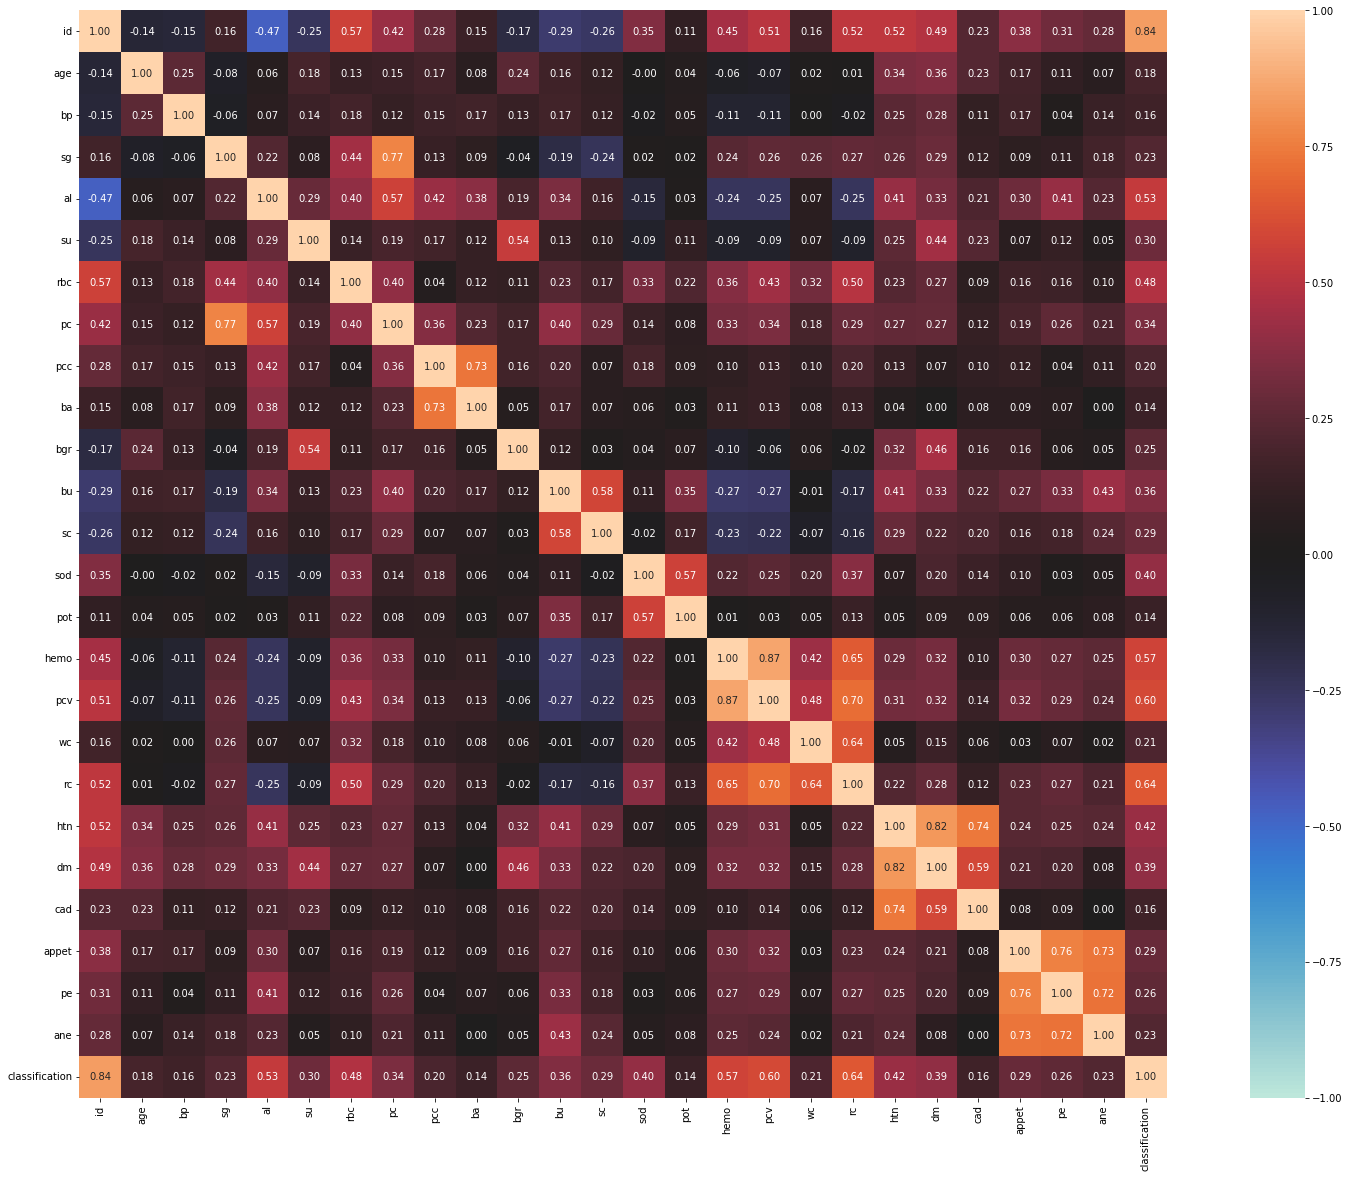

In [ ]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(30,20))

## COMPLETE CORRELATION DATASET

In [ ]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='nipy_spectral_r', axis=None).set_precision(2)

In [ ]:
df.corr().style.background_gradient(cmap="nipy_spectral_r")

## DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  \
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000   
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437   
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587   
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000   
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000   
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000   
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000   
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000   

              pcv            wc          rc  
count  329.000000    294.000000  269.000000  
mean    38.884498   8406.122449    4.707435  
std      8.990105   2944.474190    1.025323  
min      9.000000   2200.000000    2.100000  
25%     32.000000   6500.000000    3.900000  
50%     40.000000   8000.000000    4.800000  
75%     45.000000   9800.000000    5.400000  
max     54.000000  26400.000000    8.000000

## NULL VALUES

In [ ]:
missing_values=df.columns[df.isnull().any()]
df[missing_values].isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

## GRAPHICAL REPRESENTATION OF NULL VALUES

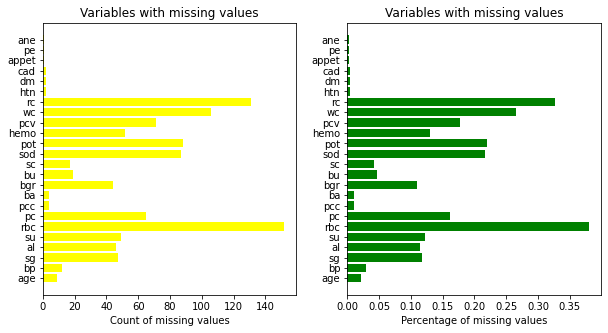

In [ ]:
labels = []
valuecount = []
percentcount = []
for col in missing_values:
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
    percentcount.append(df[col].isnull().sum()/df.shape[0]) 
ind = np.arange(len(labels))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
rects = ax1.barh(ind, np.array(valuecount), color='yellow')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");
rects = ax2.barh(ind, np.array(percentcount), color='green')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");

In [ ]:
print("Total count of missing value in a dataset:",df.isnull().sum().sum() )


Total count of missing value in a dataset: 1012


## HANDLING CATEGORICAL DATA

In [ ]:
for column in df:
     if (df[column].dtype=="object"):
        print("\n",column)
        print(df[column].value_counts(),"\n")
        


 rbc
normal      201
abnormal     47
Name: rbc, dtype: int64 


 pc
normal      259
abnormal     76
Name: pc, dtype: int64 


 pcc
notpresent    354
present        42
Name: pcc, dtype: int64 


 ba
notpresent    374
present        22
Name: ba, dtype: int64 


 htn
no     251
yes    147
Name: htn, dtype: int64 


 dm
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64 


 cad
no      362
yes      34
\tno      2
Name: cad, dtype: int64 


 appet
good    317
poor     82
Name: appet, dtype: int64 


 pe
no     323
yes     76
Name: pe, dtype: int64 


 ane
no     339
yes     60
Name: ane, dtype: int64 


 classification
ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64 



In [ ]:
for column in df:
     if (df[column].dtype=="object"):        
        df.drop(df[(df[column] =="ckd\t") | (df[column] == "\tno") |(df[column] == " yes")| (df[column] == "\tyes") |(df[column] == "\t43")| (df[column]=="\t?")].index, inplace=True)


In [ ]:
for column in df:
     if (df[column].dtype=="object"):
        print("\n",column)
        print(df[column].value_counts(),"\n")


 rbc
normal      199
abnormal     47
Name: rbc, dtype: int64 


 pc
normal      256
abnormal     73
Name: pc, dtype: int64 


 pcc
notpresent    345
present        41
Name: pcc, dtype: int64 


 ba
notpresent    364
present        22
Name: ba, dtype: int64 


 htn
no     247
yes    141
Name: htn, dtype: int64 


 dm
no     256
yes    132
Name: dm, dtype: int64 


 cad
no     354
yes     34
Name: cad, dtype: int64 


 appet
good    309
poor     80
Name: appet, dtype: int64 


 pe
no     313
yes     76
Name: pe, dtype: int64 


 ane
no     330
yes     59
Name: ane, dtype: int64 


 classification
ckd       240
notckd    150
Name: classification, dtype: int64 



##  Cleaning and preprocessing of data for training a classifier

In [ ]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})


In [ ]:
#  Further cleaning
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [ ]:
df2 = df.dropna(axis=0)
df2['classification'].value_counts()

0.0    115
1.0     43
Name: classification, dtype: int64

## SPLITTING DATASET

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2['classification'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= df2['classification'] )

## GRIDSEARCHCV

In [ ]:
%matplotlib inline

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

Detailed classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

Confusion Matrix:
[[39  0]
 [ 0 14]]


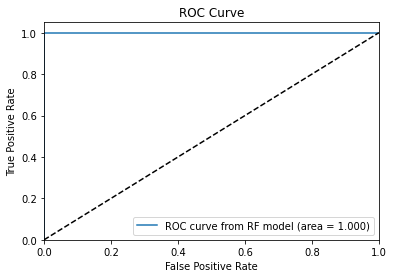

Best parameters:
{'class_weight': None, 'max_depth': 2, 'n_estimators': 8, 'random_state': 42}


In [ ]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_


In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74        35
         1.0       1.00      0.87      0.93       197

    accuracy                           0.89       232
   macro avg       0.79      0.94      0.83       232
weighted avg       0.94      0.89      0.90       232

Confusion Matrix:
[[ 35   0]
 [ 25 172]]
Accuracy: 0.892241


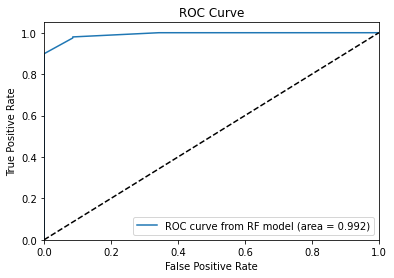

In [ ]:
df2 = df.dropna(axis=0)
no_na = df2.index.tolist()
some_na = df.drop(no_na).apply(lambda x: pd.to_numeric(x,errors='coerce'))
some_na = some_na.fillna(0) # Fill up all Nan by zero.

X_test = some_na.iloc[:,:-1]
y_test = some_na['classification']
y_true = y_test
lr_pred = clf_best.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

print('Accuracy: %3f' % accuracy_score(y_true, lr_pred))
# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf_best, X_test, y_test, 'RF')
 


In [ ]:
import pickle
pickle. dump(clf_best, open('randomclass_chronic', 'wb'))

### By using the random forest we got the accuracy of about 89%

## xgboost

In [ ]:
from xgboost import XGBClassifier


In [ ]:
params={'learning-rate':[0,0.5,0.20,0.25],
        'max_depth':[5,8,10],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.4],
       'colsample_bytree':[0.3,0.4,0.7]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
classifier=XGBClassifier()


In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [ ]:
random_search.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning-rate': [0, 0.5, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_    #Checking for best model


XGBClassifier(colsample_bytree=0.7, gamma=0.2, learning-rate=0.25, max_depth=5)

In [ ]:
random_search.best_params_


{'min_child_weight': 1,
 'max_depth': 5,
 'learning-rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [ ]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='(-1,1)', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=1)

In [ ]:
classifier.fit(X_train,y_train)


XGBClassifier(colsample_bytree=0.3, gamma=0.2, gpu_id=1,
              interaction_constraints='', learning_rate=0.300000012,
              max_depth=5, monotone_constraints='(-1,1)', n_jobs=8,
              num_parallel_tree=1, tree_method='exact', validate_parameters=1)

In [ ]:
y_pred=classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
confusion_matrix(y_test,y_pred)


array([[ 35,   0],
       [ 31, 166]])

In [ ]:
accuracy_score(y_test,y_pred)


0.8663793103448276

## By using xg boost we got the accuracy of about 83% so we are using random forest algorithm for prediction as it shows the good accuracy

# RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
X_test.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
pickle. dump(reg, open('randomreg_chronic', 'wb'))

In [ ]:
y_pred

array([0.71, 0.87, 1.  , 0.86, 0.85, 0.19, 0.8 , 1.  , 1.  , 1.  , 0.21,
       1.  , 0.97, 0.21, 0.05, 0.92, 0.21, 0.08, 0.84, 0.21, 0.21, 0.79,
       0.76, 1.  , 0.92, 1.  , 0.92, 0.99, 0.92, 0.97, 0.94, 0.08, 0.07,
       0.92, 1.  , 1.  , 0.05, 0.8 , 1.  , 0.21, 1.  , 0.21, 0.01, 0.94,
       0.87, 1.  , 0.21, 0.21, 0.92, 0.92, 0.87, 0.92, 1.  , 0.87, 1.  ,
       0.  , 0.  , 0.87, 1.  , 0.79, 0.92, 0.21, 0.85, 0.21, 0.21, 0.21,
       0.79, 1.  , 0.21, 0.91, 0.08, 0.21, 0.79, 0.92, 0.92, 0.21, 0.08,
       0.87, 1.  , 0.14, 1.  , 0.21, 0.13, 0.21, 0.92, 0.08, 0.21, 0.2 ,
       1.  , 0.87, 0.08, 1.  , 0.02, 0.87, 0.05, 0.87, 0.08, 0.89, 0.8 ,
       0.21, 0.8 , 0.21, 0.21, 0.2 , 0.79, 0.08, 0.21, 0.21, 0.03, 0.21,
       1.  , 1.  , 0.08, 0.92, 0.21, 0.92, 1.  , 0.79, 0.21, 0.79, 0.81,
       0.21, 0.08, 1.  , 1.  , 1.  , 1.  , 0.21, 0.79, 0.21, 0.21, 0.01,
       0.08, 0.21, 0.01, 0.98, 0.21, 0.97, 0.91, 0.85, 0.2 , 0.21, 0.93,
       1.  , 0.98, 0.92, 0.08, 0.21, 1.  , 0.79, 0.

In [ ]:
l_pred=list(y_pred)

In [ ]:
l_test=list(y_test)

In [ ]:
d={'prob':l_pred,'out':y_test}

In [ ]:
df_i=pd.DataFrame(d)


In [ ]:
df_i.head(20)

prob  out
0   0.71  1.0
1   0.87  1.0
2   1.00  1.0
4   0.86  1.0
5   0.85  1.0
6   0.19  1.0
7   0.80  1.0
8   1.00  1.0
10  1.00  1.0
12  1.00  1.0
13  0.21  1.0
15  1.00  1.0
16  0.97  1.0
17  0.21  1.0
18  0.05  1.0
19  0.92  1.0
21  0.21  1.0
23  0.08  1.0
24  0.84  1.0
25  0.21  1.0

In [ ]:
df_i.to_csv(r"/content/chronickidneydisease.csv")

## Finally we get the accuracy of about 89% on random forest algorithm